## 1. Introduction

There are numerous approaches to plot graphs in R. The base R provides many basic plot functions. Let's try a few simple plots.

1. https://colab.research.google.com/github/tdmdal/r-tutorial-201920-winter/blob/master/docs/part3_visualization.ipynb
1. [Graphics for communication](https://r4ds.had.co.nz/graphics-for-communication.html) chapter in [R for Data Science](https://r4ds.had.co.nz/)
1. `ggplot()` [document](https://ggplot2.tidyverse.org/index.html).


In [1]:
# cars is a built-in dataset (data frame)
print(head(cars))

  speed dist
1     4    2
2     4   10
3     7    4
4     7   22
5     8   16
6     9   10


`plot()` is a so-called "generic" function. A generic function behaves differently depending on the objects (e.g. data structures) it takes in. In this case, `plot()` plots different type of graphs depending on its input. (the plot() method is associated with the input object's class.)

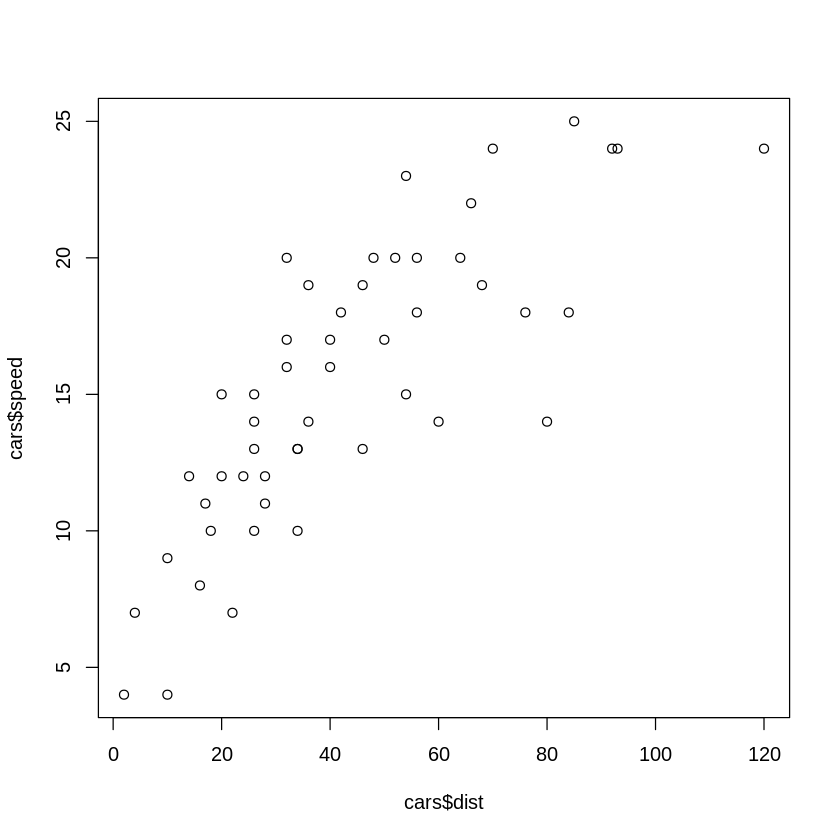

In [2]:
# plot() takes in x- and y- axis
plot(cars$dist, cars$speed)

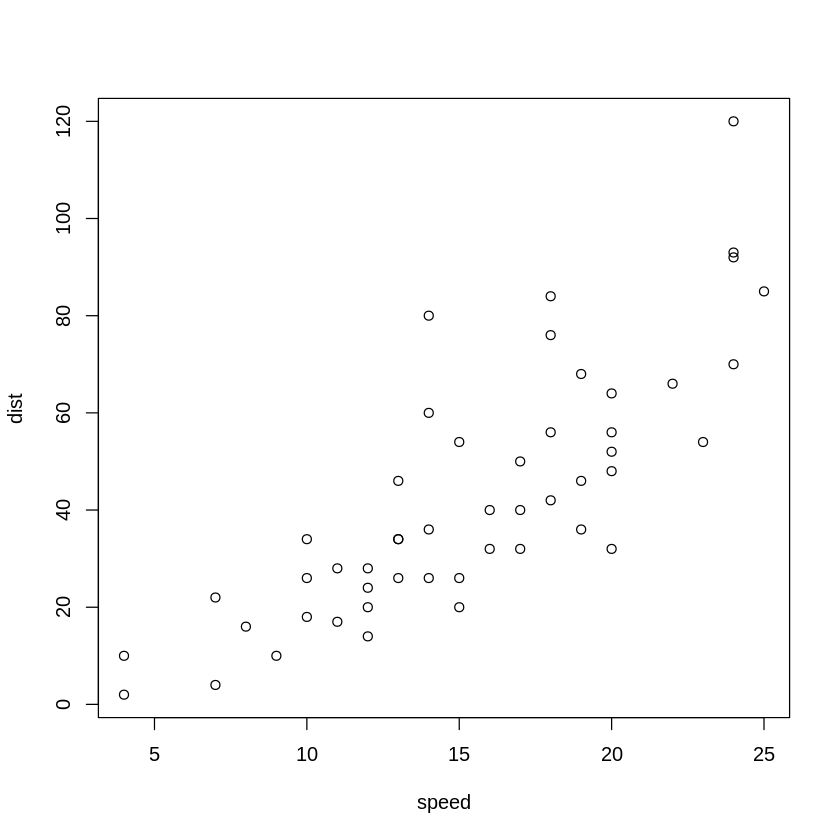

In [3]:
# plot() takes in a dataframe, which in this case only have 2 variables/columns
plot(cars)

In [4]:
# iris is another built-in dataset
print(head(iris))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


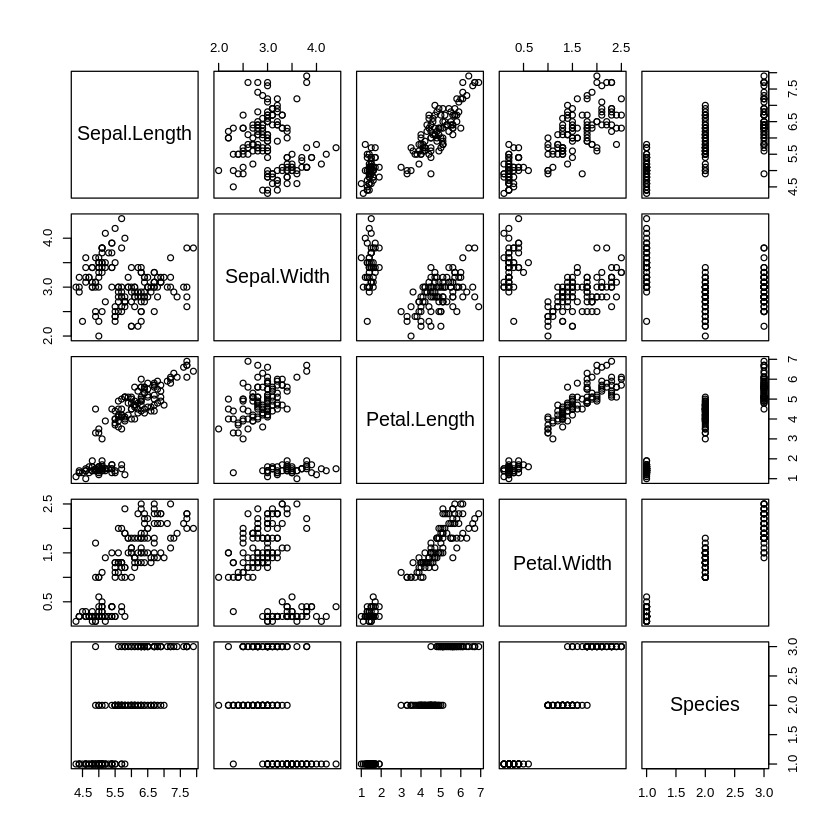

In [5]:
# plot() takes in a dataframe with many variables/columns
plot(iris)

`hist()` is another generic function to plot simple histogram.

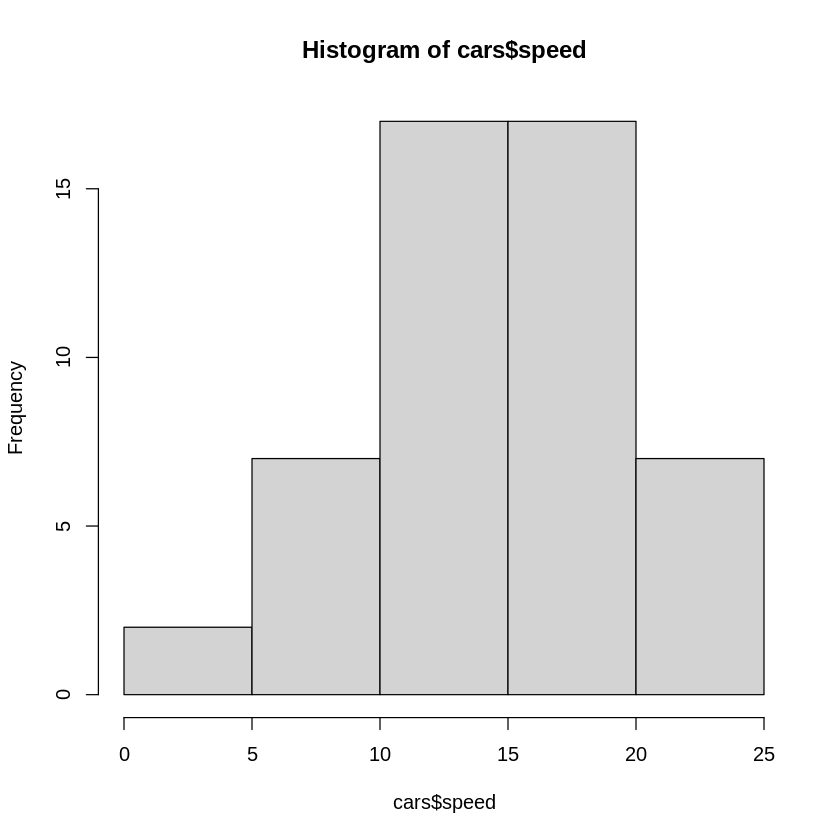

In [6]:
hist(cars$speed)

Customize the histogram plot.

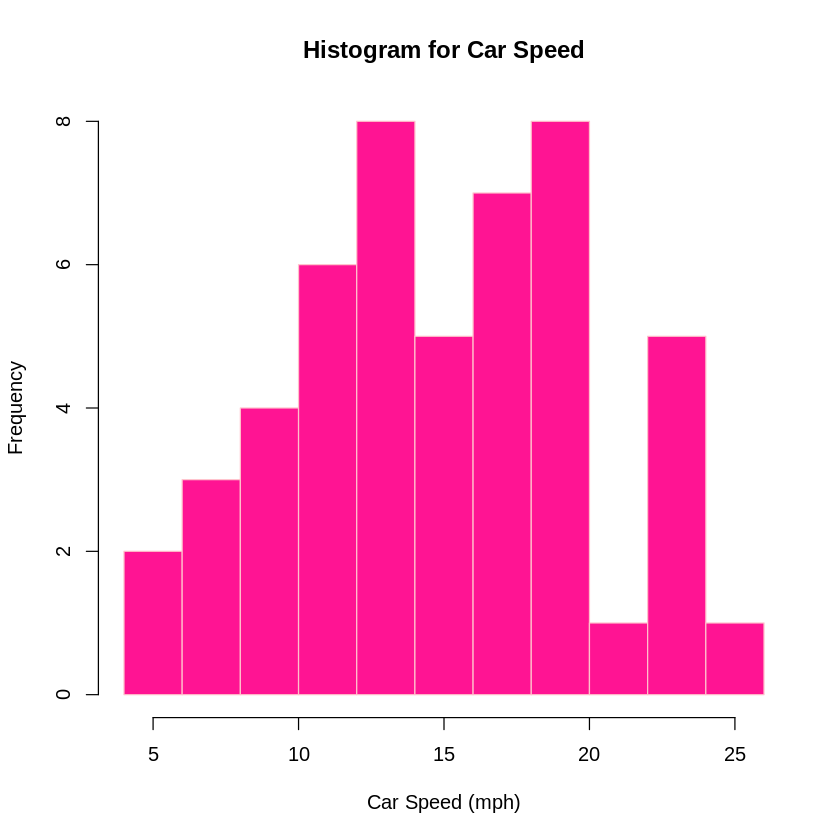

In [7]:
hist(cars$speed,
     main="Histogram for Car Speed",
     xlab="Car Speed (mph)",
     border="pink",
     col="deeppink",
     breaks=8) # suggesting number of cells/bins

I'll leave you to explore base R plot yourself. Here is a good start, http://rpubs.com/SusanEJohnston/7953.

## 2. `ggplot()`

Today we will focus on learning `ggplot()` from the `ggplot2` package, a powerful R plotting package based on [the grammar of graphics](http://vita.had.co.nz/papers/layered-grammar.html).  The idea is that "you can build every graph from the same components: a data set, a coordinate system, and geoms - visual marks that represent data points" (see the ggplot2 [cheat sheet](https://www.rstudio.com/resources/cheatsheets/#ggplot2)). The grammar of graphics enables us to concisely describe the components of a graphics.

Let's learn `ggplot()` using an example. (This example is inspired and built upon this [notebook](http://remi-daigle.github.io/2016-04-15-UCSB/viz)).

First, load a few packages.

In [8]:
# run this cell to install two packages we will use today
if (!require(gapminder)) install.packages("gapminder")
if (!require(ggrepel)) install.packages("ggrepel")

Loading required package: gapminder

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gapminder’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggrepel

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggrepel’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [9]:
# for data manipulation
library(dplyr)

# the plotting package
library(ggplot2)

# gapminder contains the data we will use for our plot
library(gapminder)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Let's take a quick look at the gapminder dataset.

In [10]:
print(head(gapminder))

# A tibble: 6 × 6
  country     continent  year lifeExp      pop gdpPercap
  <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
1 Afghanistan Asia       1952    28.8  8425333      779.
2 Afghanistan Asia       1957    30.3  9240934      821.
3 Afghanistan Asia       1962    32.0 10267083      853.
4 Afghanistan Asia       1967    34.0 11537966      836.
5 Afghanistan Asia       1972    36.1 13079460      740.
6 Afghanistan Asia       1977    38.4 14880372      786.


In [11]:
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

We will only use data from the most recent year in gapminder.

In [12]:
# get data from the most recent year
g_data <- gapminder %>%
  filter(year == 2007)
print(head(g_data))

# A tibble: 6 × 6
  country     continent  year lifeExp      pop gdpPercap
  <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
1 Afghanistan Asia       2007    43.8 31889923      975.
2 Albania     Europe     2007    76.4  3600523     5937.
3 Algeria     Africa     2007    72.3 33333216     6223.
4 Angola      Africa     2007    42.7 12420476     4797.
5 Argentina   Americas   2007    75.3 40301927    12779.
6 Australia   Oceania    2007    81.2 20434176    34435.


Let's understand in general how `ggplot()` works: a layer-by-layer approach (see slides).

Now, let's plot `lifeExp` against `gdpPercap` (scatter plot).

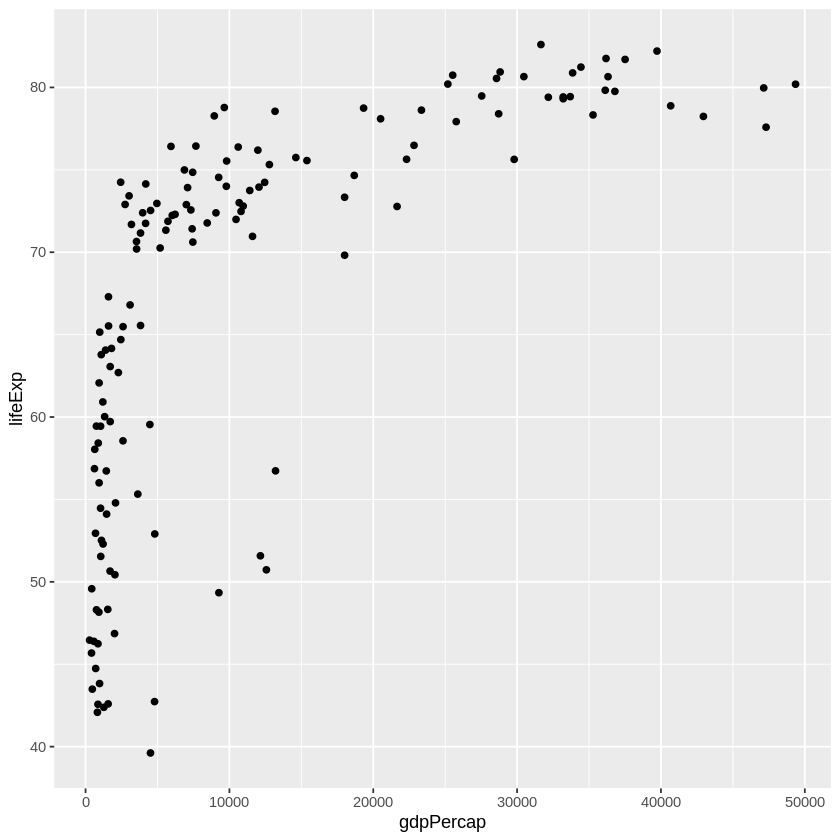

In [13]:
# scatterplot of life expectancy vs GDP per capita
ggplot(g_data, aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

What will you do if you want to connect those dots (i.e. make it a line plot)? This is just for exercise. Obviously it doesn't make too much sense to connect those dots.

In [14]:
# your code here


What if you want to color the points in Rotman "deeppink"?

In [15]:
# your code here


What if you want to label the dots by country name? Does the picture look nice? What did you find out?

In [16]:
# your code here


How to make the size of the points proportional to country population (`pop`)?

In [17]:
# your code here


In addition, can you color the points by continent (i.e. no more Rotman "deeppink")?

In [18]:
# your code here


Can you add plot title and x- and y-axis title? Hint: add `labs(title = 'my title')` and `labs(x = "x title", y = "y title")` layers. At the same time, make the dots a bit lighter (`alpha` of the `geom_point()`)

In [19]:
# your code here


OK. Let's do a few more things together.

1. improve the legend title
2. make the population in million (M)
3. move the plot title to the middle
4. format x-axis tick with comma_format

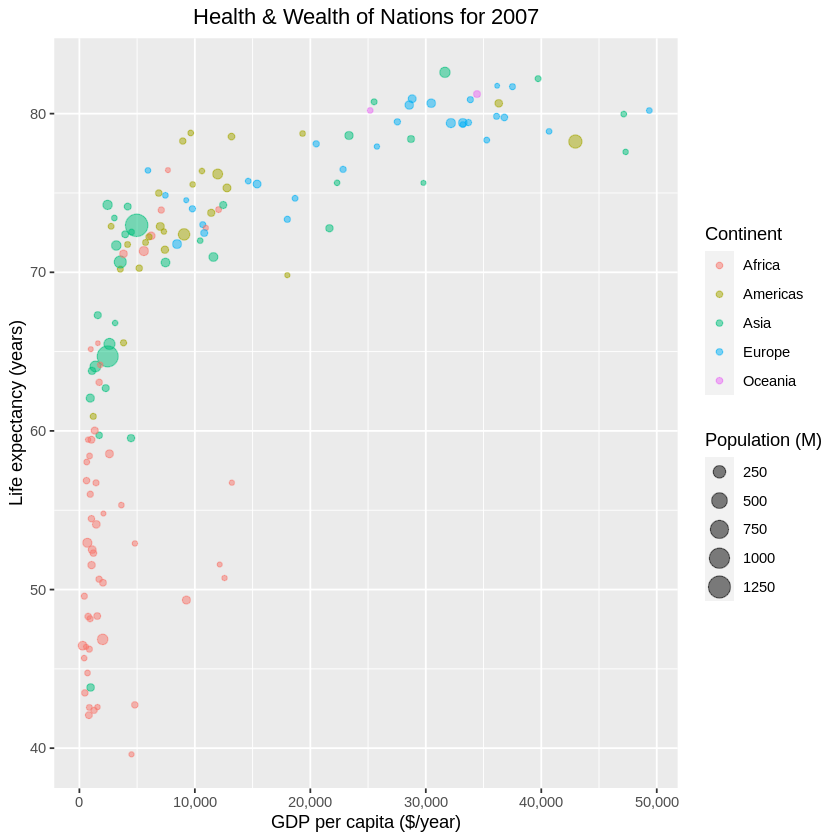

In [20]:
library(scales)
gapminder %>%
  filter(year == 2007) %>%
  mutate(pop_m = pop / 1e6) %>% #population in million
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    scale_x_continuous(labels = comma_format()) + #x-axis label comma format
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") + #legend title
    theme(plot.title = element_text(hjust = 0.5)) #center the plot title

Just for an exercise, let's find Canada and label it.

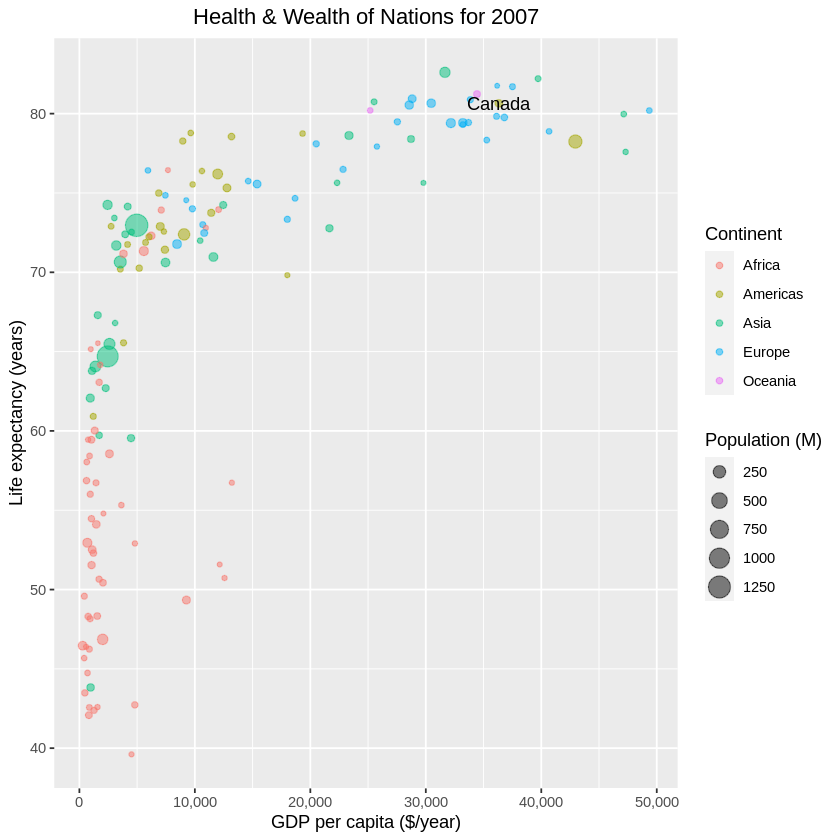

In [21]:
# add Canada label
gapminder %>%
  filter(year == 2007) %>%
  mutate(pop_m = pop / 1e6) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    geom_text(data = filter(gapminder, country == "Canada" & year == 2007), aes(label = country)) +
    scale_x_continuous(labels = comma_format()) +
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") +
    theme(plot.title = element_text(hjust = 0.5))

The default label couldn't clearly identify the dot for Canada. Let's use the [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) package to improve the labeling.

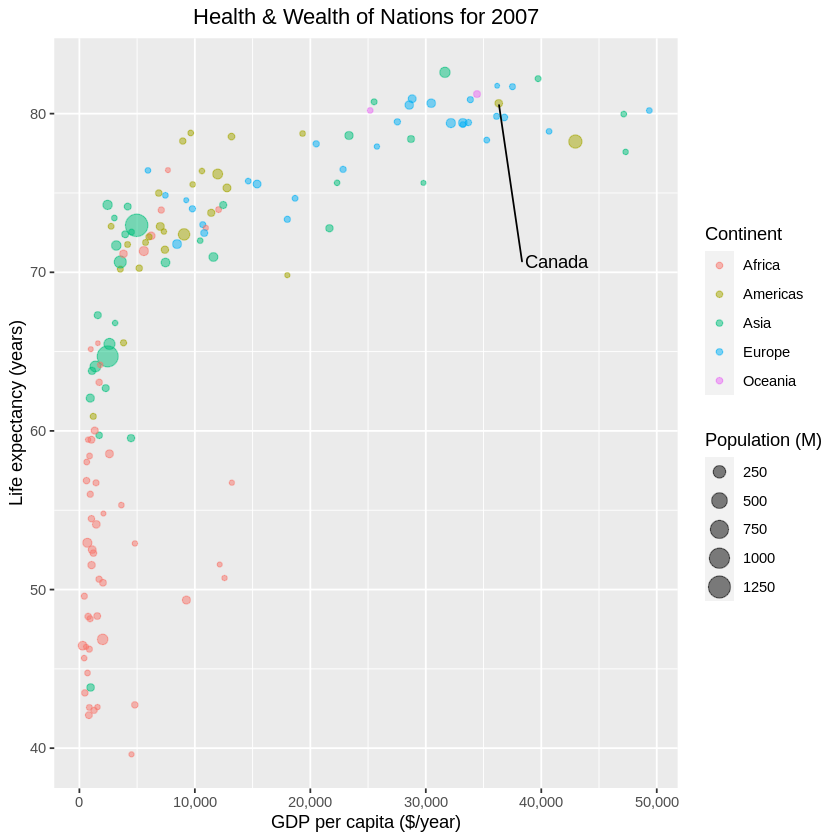

In [22]:
library(ggrepel)
gapminder %>%
  filter(year == 2007) %>%
  mutate(pop_m = pop / 1e6) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    geom_text_repel(
      data = filter(gapminder, country == "Canada" & year == 2007),
      aes(label = country),
      nudge_x = 5000,
      nudge_y = -10) +
    scale_x_continuous(labels = comma_format()) +
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") +
    theme(plot.title = element_text(hjust = 0.5))

Let's make the x-axis in log scale.

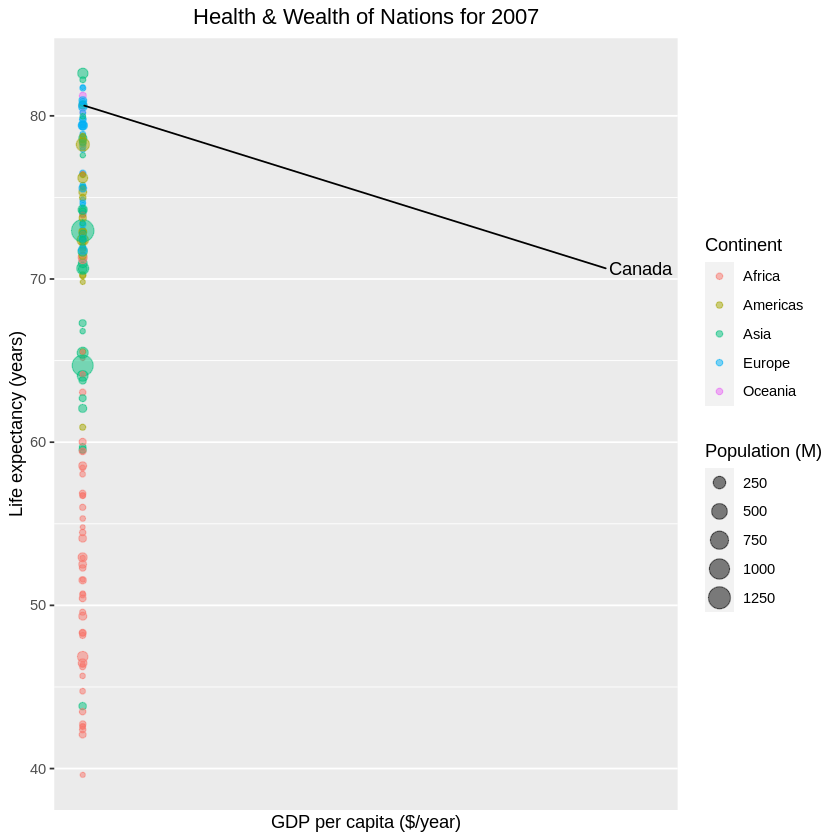

In [23]:
# log
gapminder %>%
  filter(year == 2007) %>%
  mutate(pop_m = pop / 1e6) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    geom_text_repel(
      data = filter(gapminder, country == "Canada" & year == 2007),
      aes(label = country),
      nudge_x = 5000,
      nudge_y = -10) +
    scale_x_continuous(labels = comma_format(), trans = 'log10') +
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") +
    theme(plot.title = element_text(hjust = 0.5))

Let's add a linear regression line.

`geom_smooth()` using formula = 'y ~ x'


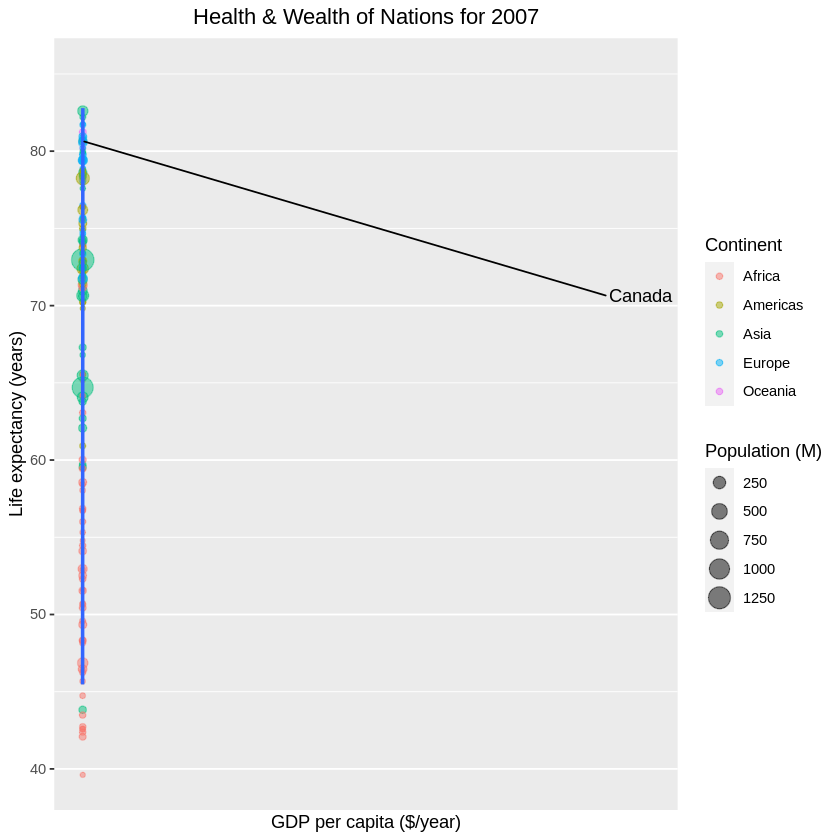

In [24]:
# smooth - lm
gapminder %>%
  filter(year == 2007) %>%
  mutate(pop_m = pop / 1e6) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    geom_smooth(method = "lm") +
    geom_text_repel(
      data = filter(gapminder, country == "Canada" & year == 2007),
      aes(label = country),
      nudge_x = 5000,
      nudge_y = -10) +
    scale_x_continuous(labels = comma_format(), trans = 'log10') +
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") +
    theme(plot.title = element_text(hjust = 0.5))

What if we don't use log scale on x-axis and let ggplot fit a smooth curve for us?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


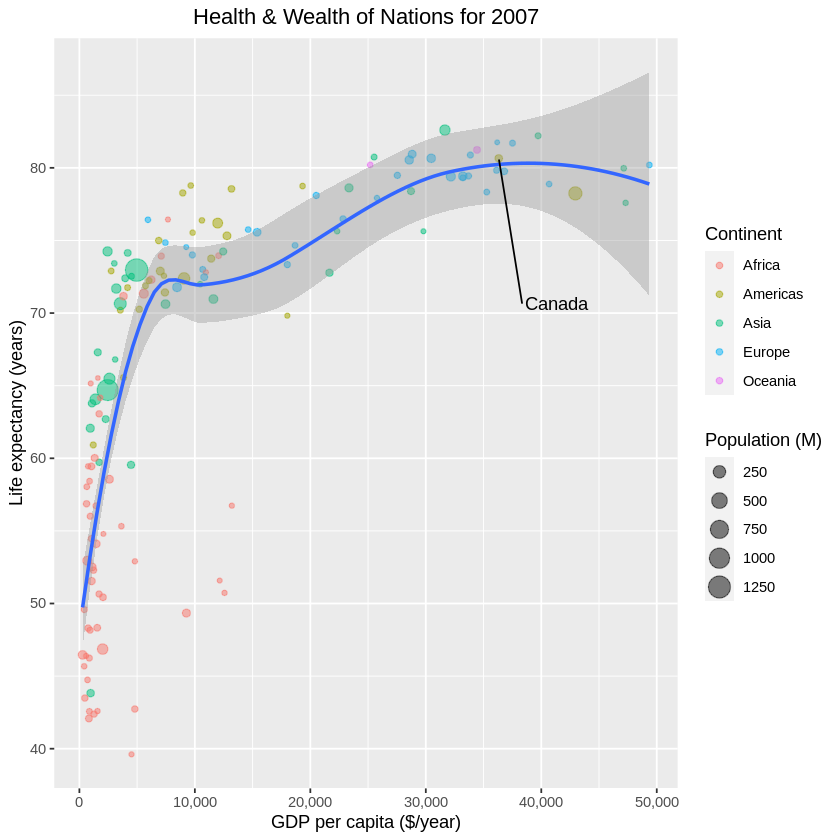

In [25]:
# smooth - auto
gapminder %>%
  filter(year == 2007) %>%
  mutate(pop_m = pop / 1e6) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    geom_smooth(method = "auto") +
    geom_text_repel(
      data = filter(gapminder, country == "Canada" & year == 2007),
      aes(label = country),
      nudge_x = 5000,
      nudge_y = -10) +
    scale_x_continuous(labels = comma_format()) +
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") +
    theme(plot.title = element_text(hjust = 0.5))

Let's compare plots between 2002 and 2007 using faceting (`facet_grid`).

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


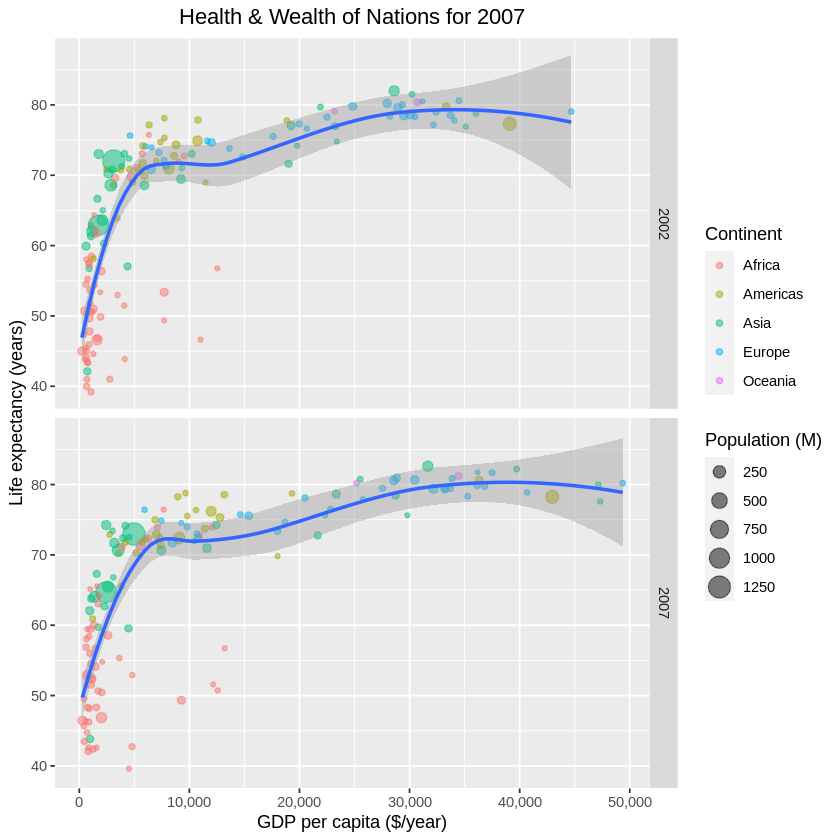

In [26]:
# smooth
gapminder %>%
  filter(year == 2007 | year == 2002) %>%
  mutate(pop_m = pop / 1e6) %>%
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(aes(size = pop_m, color = continent), alpha = 0.5) +
    geom_smooth(method = "auto") +
    scale_x_continuous(labels = comma_format()) +
    labs(title = 'Health & Wealth of Nations for 2007') +
    labs(x = "GDP per capita ($/year)", y = "Life expectancy (years)") +
    labs(color = "Continent", size = "Population (M)") +
    theme(plot.title = element_text(hjust = 0.5)) +
    facet_grid(year~.)

## Exercise

Take a look at the diamonds dataset. Produce a scatter plot with `price` (y) against `carat` (x) and color the dots by `clarity`. Fine tune the plots to make it as nice as you can.

In [27]:
# take a look at the diamonds dataset
head(diamonds)

# your code below

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
